In [1]:
import os
import time
import json
import requests
from datetime import datetime, timedelta

API_KEY = os.getenv("NASA_API_KEY")
APOD_URL = f"https://api.nasa.gov/planetary/apod?"

In [11]:
def get_apod_data(api_key, date):
    url = APOD_URL + f"api_key={api_key}" + f"&date={date}"

    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    
    except Exception as e:
        print(f"Error fetching data for {date}: {e}")
        return None

# print( get_apod_data(API_KEY, "2025-02-14") )


In [13]:
def fetch_multiple_apod_data(api_key, start_date, end_date, filename):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")

    exist_data = []
    if os.path.exists(filename):
        with open(filename, "r") as file:
            try:
                exist_data = json.load(file)
            except json.JSONDecodeError:
                pass
    date = start_date

    existing_dates = {date_entry["date"] for date_entry in exist_data}

    while date <= end_date:
        date_string = date.strftime("%Y-%m-%d")
        if (date_string not in existing_dates):
            data = get_apod_data(api_key, date_string)
            if (data):
                exist_data.append(data)
                with open(filename, "w") as file:
                    json.dump(exist_data, file, indent=4)
        time.sleep(1)
        date += timedelta(days=1)

def fetch_multiple_apod_data_2(api_key, start_date, end_date):
    url = APOD_URL + f"api_key={api_key}" + f"&start_date={start_date}" + f"&end_date={end_date}"
    response = requests.get(url)
    if (response.status_code == 200):
        print(response.text)

if __name__ == "__main__":
    fetch_multiple_apod_data(API_KEY, "2024-06-01", "2025-03-03" , "apod_data.json")

Error fetching data for 2024-07-05: 502 Server Error: Bad Gateway for url: https://api.nasa.gov/planetary/apod?api_key=BN5b0kkIKTMWnyBnTnixyiRlyVh21yREU8N8TG57&date=2024-07-05


In [ ]:
def read_apod_data(filename):
    try:
        with open(filename, "r") as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"File {filename} not found")
    except json.JSONDecodeError:
        print(f"File {filename} contains invalid JSON")
    except PermissionError:
        print(f"Permission denied when trying to read {filename}")     
    return []

if __name__ == "__main__":
    data = read_apod_data("apod_data.json")
    for entry in data:
        print(entry["date"], ":",  entry["title"])

2024-06-01 : Stereo Helene
2024-06-02 : Rotating Moon from LRO
2024-06-03 : NGC 2403 in Camelopardalis
2024-06-04 : Comet Pons-Brooks Develops Opposing Tails
2024-06-05 : Shadow of a Martian Robot
2024-06-06 : NGC 4565: Galaxy on Edge
2024-06-07 : SH2-308: The Dolphin Head Nebula
2024-06-08 : Pandora's Cluster of Galaxies
2024-06-09 : How to Identify that Light in the Sky
2024-06-10 : Sh2-132: The Lion Nebula
2024-06-11 : Colorful Stars and Clouds near Rho Ophiuchi
2024-06-12 : Aurora over Karkonosze Mountains
2024-06-13 : Messier 66 Close Up
2024-06-14 : RCW 85
2024-06-15 : Prominences and Filaments on the Active Sun
2024-06-16 : Animation: Black Hole Destroys Star
2024-06-17 : Ou4: The Giant Squid Nebula
2024-06-18 : Gigantic Jets over Himalayan Mountains
2024-06-19 : NGC 6188: Dragons of Ara
2024-06-20 : Sandy and the Moon Halo
2024-06-21 : Hubble's NGC 1546
2024-06-22 : Lynds Dark Nebula 1251
2024-06-23 : The Colors of Saturn from Cassini
2024-06-24 : JADES-GS-z14-0: A New Farthest

In [ ]:
def analyze_apod_media(filename):
    data = read_apod_data(filename)
    image_count = 0
    video_count = 0
    longest_exp = ""
    longest_exp_date = ""

    for entry in data:
        if entry["media_type"].lower() == "image":
            image_count += 1
        elif entry["media_type"].lower() == "video":
            video_count += 1
        if len(entry["explanation"]) > len(longest_exp):
            longest_exp = entry["explanation"]
            longest_exp_date = entry["date"]

    print(f"Image count: {image_count}")
    print(f"Video count: {video_count}")
    print(f"Longest explanation date: {longest_exp_date}")

if __name__ == "__main__":
    analyze_apod_media("apod_data.json")

Image count: 253
Video count: 21
Longest explanation date: 2024-07-15


In [ ]:
import csv

def save_to_csv(filename, new_filename):
    data = read_apod_data(filename)
    try:
        with open(new_filename, mode="a", newline="") as file:
            writer = csv.writer(file)
            if (os.path.exists(new_filename)):
                writer.writerow(["Date", "Title", "Media Type", "URL"])
            for entry in data:
                writer.writerow([entry.get("date", "N/A"), entry.get("title", "N/A"), entry.get("media_type", "N/A"), entry.get("url", "N/A")])
    except PermissionError:
        print(f"Permission denied when trying to write {new_filename}")
    # except Exception as e:
    #     print(f"Error writing to {new_filename}: {e}")

if __name__ == "__main__":
    save_to_csv("apod_data.json", "apod_summary.csv")

In [79]:
import numpy as np

def generate_valid_array(rows, cols, min_val, max_val):
    while True:
        arr = np.random.randint(min_val, max_val, (rows, cols))

        for row_ind in range(rows):
            if (arr[row_ind].sum() % 2 != 0):
                arr[row_ind, np.random.randint(0, cols)] += 1

        sum = arr.sum()
        if (sum % 5 == 0):
            return arr

if __name__ == "__main__":
    array = generate_valid_array(20, 5, 10, 100)
    print("Generated array:")
    print(array)

    divisible_by_3_and_5 = array[(array % 3 == 0) & (array % 5 == 0)]
    print("\nValues divisible by 3 and 5:")
    print(divisible_by_3_and_5)

    print("\nNew array after replacing values greater than 75 with mean:")
    array[array > 75] = np.mean(array)
    print(array)

    print("\nStatistics:")
    print("Mean:", np.mean(array))
    print("Median:", np.median(array))
    print("Standard deviation:", np.std(array))
    print("Variance:", np.var(array, axis=0))


Generated array:
[[ 38  48  18  62  82]
 [ 17  13  62  91  89]
 [ 47  51  40  55  97]
 [ 14  86  83  11  14]
 [ 67  96  54  74  15]
 [ 91  94  84  11  54]
 [ 33  51  15  28  73]
 [ 26  23  83  91  23]
 [ 85  53  95  60  13]
 [ 45  35  39  65  72]
 [ 88  33  80  85  88]
 [ 66  12  89  50  63]
 [ 58  32  39  87  68]
 [ 51  38  63  18  42]
 [ 18  59  66 100  65]
 [ 29  13  30  45  27]
 [ 10  62  49  73  90]
 [ 46  17  80  61  80]
 [ 13  17  54  25  59]
 [ 23  76  20  54  93]]

Values divisible by 3 and 5:
[15 15 60 45 30 45 90]

New array after replacing values greater than 75 with mean:
[[38 48 18 62 52]
 [17 13 62 52 52]
 [47 51 40 55 52]
 [14 52 52 11 14]
 [67 52 54 74 15]
 [52 52 52 11 54]
 [33 51 15 28 73]
 [26 23 52 52 23]
 [52 53 52 60 13]
 [45 35 39 65 72]
 [52 33 52 52 52]
 [66 12 52 50 63]
 [58 32 39 52 68]
 [51 38 63 18 42]
 [18 59 66 52 65]
 [29 13 30 45 27]
 [10 62 49 73 52]
 [46 17 52 61 52]
 [13 17 54 25 59]
 [23 52 20 54 52]]

Statistics:
Mean: 43.39
Median: 52.0
Standard 

In [48]:
import pandas as pd

df = pd.read_csv("iris.csv")

In [49]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
print("Data points:", df.shape[0])
print("\nColumns:", df.columns)
print("\nData types:\n", df.dtypes)
print("\nUnique species:", df["class"].unique())

Data points: 150

Columns: Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

Data types:
 sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

Unique species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [54]:
df.loc[34] = [4.9, 3.1, 1.5, 0.2, "Iris-setosa"]
df.loc[37] = [4.9, 3.6, 1.4, 0.1, "Iris-setosa"]

In [55]:
print(df.loc[[34, 37]])

    sepal length  sepal width  petal length  petal width        class
34           4.9          3.1           1.5          0.2  Iris-setosa
37           4.9          3.6           1.4          0.1  Iris-setosa


In [56]:
df["Petal Ratio"] = df["petal length"] / df["petal width"]
df["Sepal Ratio"] = df["sepal length"] / df["sepal width"]

In [57]:
df.head()

,sepal length,sepal width,petal length,petal width,class,Petal Ratio,Sepal Ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.388889


In [58]:
df.to_csv("iris_corrected.csv", index=False)

In [61]:
num_df = df.select_dtypes(include=[np.number])
correlation_matrix = num_df.corr()
print(correlation_matrix)

              sepal length  sepal width  petal length  petal width  \
sepal length      1.000000    -0.117570      0.871754     0.817941   
sepal width      -0.117570     1.000000     -0.428440    -0.366126   
petal length      0.871754    -0.428440      1.000000     0.962865   
petal width       0.817941    -0.366126      0.962865     1.000000   
Petal Ratio      -0.573856     0.367547     -0.700366    -0.748906   
Sepal Ratio       0.729917    -0.748133      0.837733     0.753767   

              Petal Ratio  Sepal Ratio  
sepal length    -0.573856     0.729917  
sepal width      0.367547    -0.748133  
petal length    -0.700366     0.837733  
petal width     -0.748906     0.753767  
Petal Ratio      1.000000    -0.611992  
Sepal Ratio     -0.611992     1.000000  


In [80]:
corr_unstacked = correlation_matrix.unstack()
corr_unstacked = corr_unstacked[corr_unstacked != 1]
print(corr_unstacked)

highest_positive_corr = corr_unstacked.idxmax()
highest_negative_corr = corr_unstacked.idxmin()

print(f"\nHighest positive correlation: {highest_positive_corr}")
print(f"Highest negative correlation: {highest_negative_corr}")

sepal length  sepal width    -0.117570
              petal length    0.871754
              petal width     0.817941
              Petal Ratio    -0.573856
              Sepal Ratio     0.729917
sepal width   sepal length   -0.117570
              petal length   -0.428440
              petal width    -0.366126
              Petal Ratio     0.367547
              Sepal Ratio    -0.748133
petal length  sepal length    0.871754
              sepal width    -0.428440
              petal width     0.962865
              Petal Ratio    -0.700366
              Sepal Ratio     0.837733
petal width   sepal length    0.817941
              sepal width    -0.366126
              petal length    0.962865
              Petal Ratio    -0.748906
              Sepal Ratio     0.753767
Petal Ratio   sepal length   -0.573856
              sepal width     0.367547
              petal length   -0.700366
              petal width    -0.748906
              Sepal Ratio    -0.611992
Sepal Ratio   sepal lengt

<Figure size 800x600 with 0 Axes>

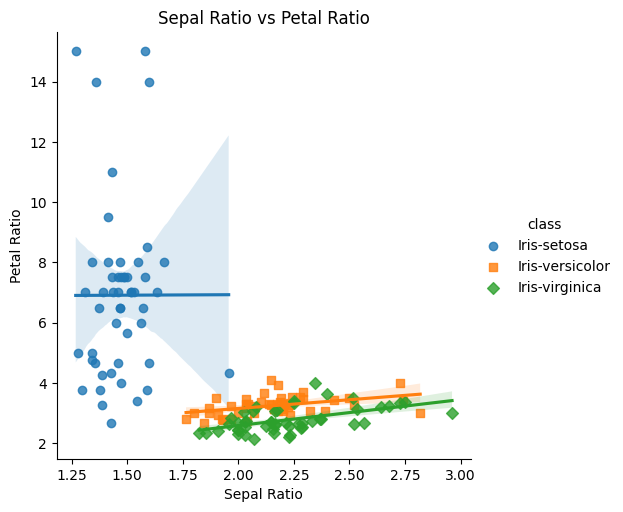

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x="Sepal Ratio", y="Petal Ratio", hue="class", markers=["o", "s", "D"])
plt.title("Sepal Ratio vs Petal Ratio")
plt.savefig("iris_scatter_with_regression.pdf")
plt.show()

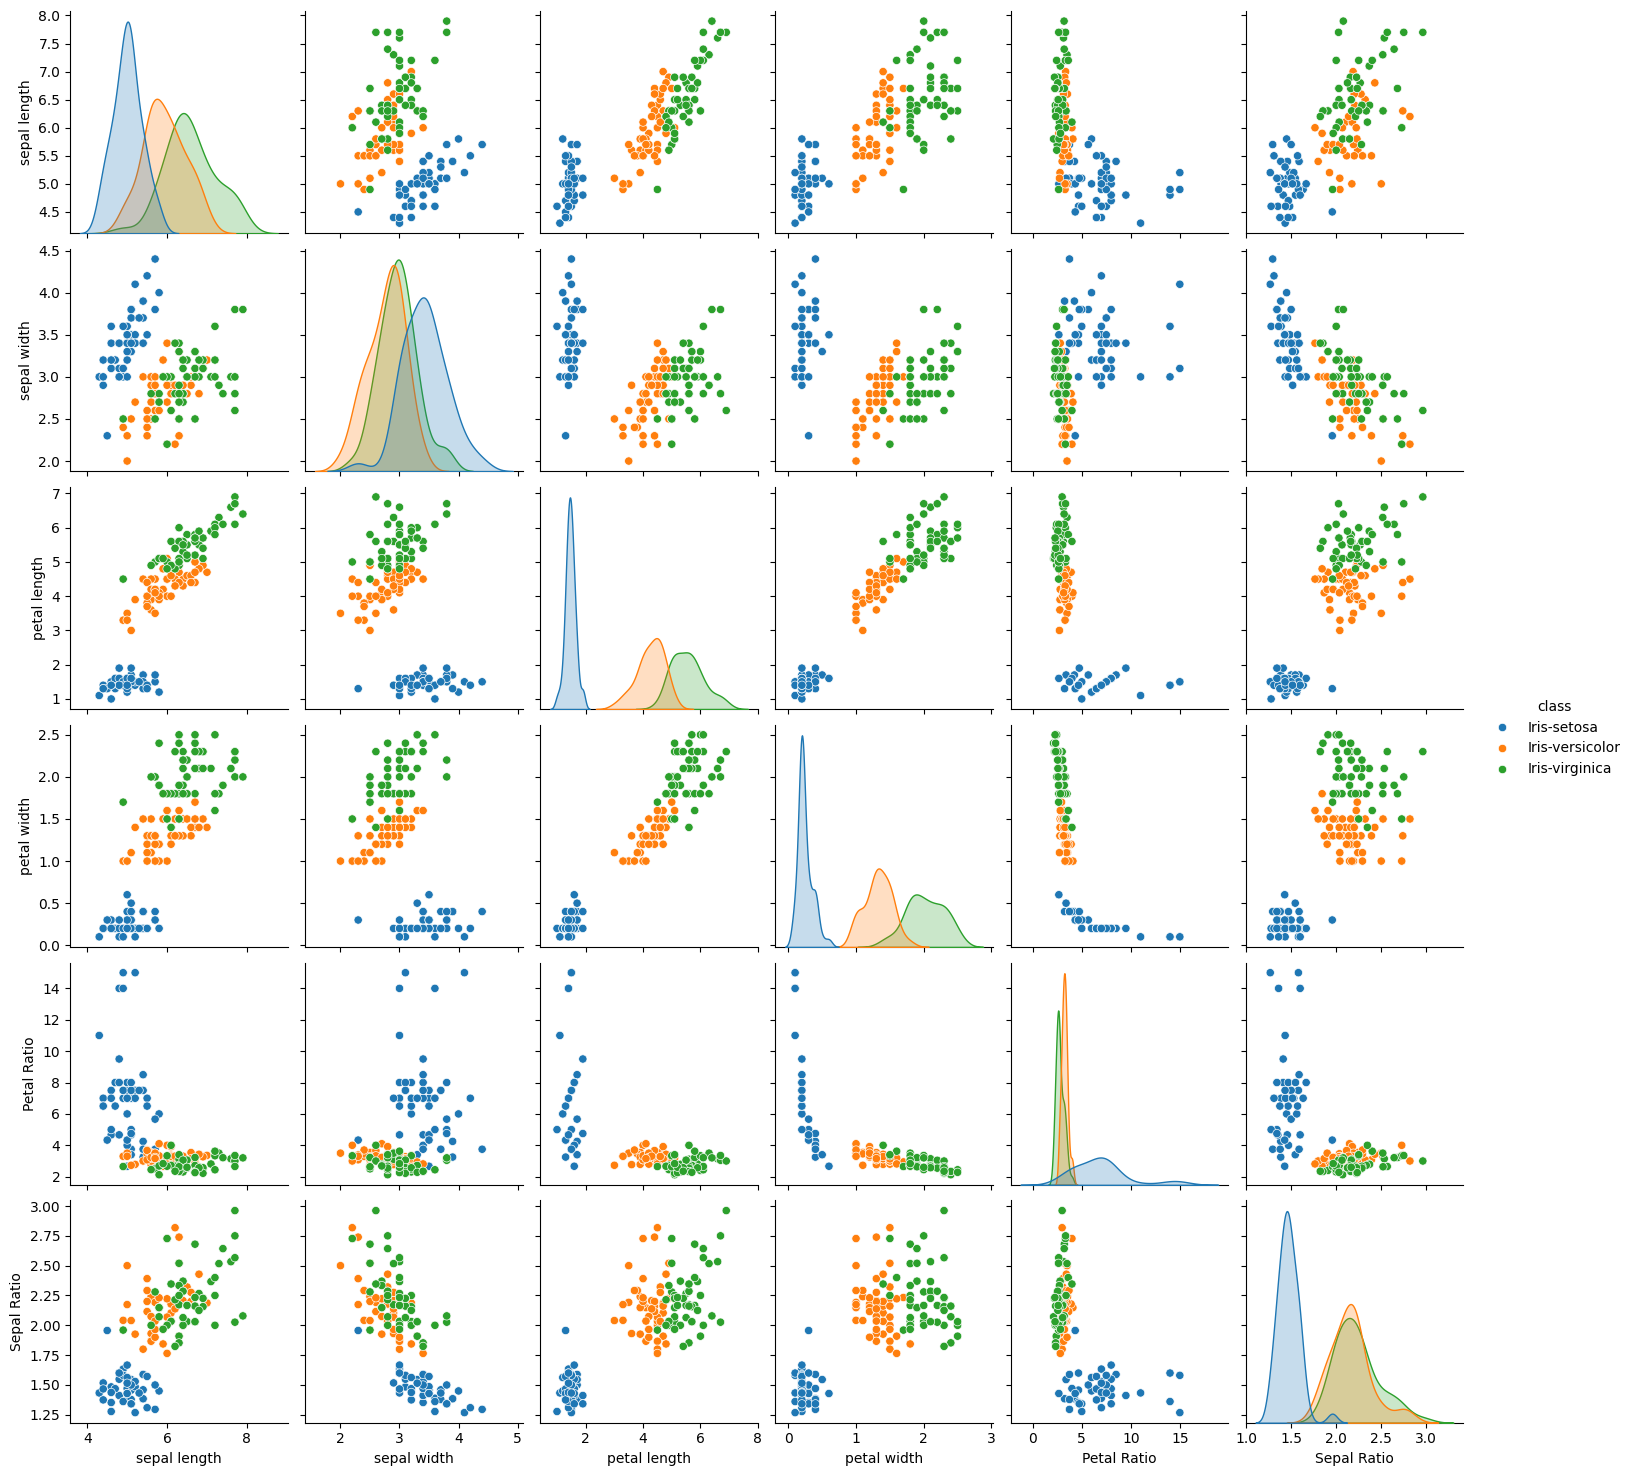

In [68]:
sns.pairplot(df, hue="class", diag_kind="kde")
plt.show()